Select the EU countries and check how they performed over the years for population, GDP, consumer index, price index etc..

Was UK bad compared to other countries?

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',300)

In [2]:
df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\WDI_csv\WDIData.csv")

In [3]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [4]:
df = df.drop(['Country Code','Indicator Code'], 1)

###### Selecting United Kingdom, other countries in eu

In [5]:
df[df['Country Name'] == "Lithuania"]

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
257742,Lithuania,"2005 PPP conversion factor, GDP (LCU per inter...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.305438e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257743,Lithuania,"2005 PPP conversion factor, private consumptio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.762915e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257744,Lithuania,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN,NaN
257745,Lithuania,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN,NaN
257746,Lithuania,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN,NaN
257747,Lithuania,"Access to electricity, urban (% of urban popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,NaN,NaN
257748,Lithuania,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.375520e+01,NaN,NaN,7.790629e+01,NaN,NaN,8.288385e+01,NaN
257749,Lithuania,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.606694e+01,NaN,NaN,7.787804e+01,NaN,NaN,8.101387e+01,NaN
257750,Lithuania,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100917e+01,NaN,NaN,7

In [6]:
df = df[df['Country Name'].isin([
    "Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"United Kingdom"
])]

In [7]:
df['Country Name'].nunique()

28

In [8]:
#df.head()

In [9]:
#Not null values for the column
# Selected 2015 because the brexit happened in 2016 
dfi2 = df[df['2015'].notnull()]

In [10]:
dfi2.to_csv("europe_uk.csv")

In [11]:
#dfi2.head()

In [12]:
dfgdp_percentage = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='GDP growth (annual %)']
dfgdp_percentage = dfgdp_percentage.drop('Indicator Name', 1)

# dfgdp_percentage = dfgdp_percentage.T.reset_index()
# dfgdp_percentage.columns = dfgdp_percentage.iloc[0]
# #dfgdp_percentage.drop(dfgdp_percentage.index[0])
# dfgdp_percentage = dfgdp_percentage.iloc[1:]
# dfgdp_percentage = dfgdp_percentage.rename(columns={ dfgdp_percentage.columns[0]: "Year" })
# dfgdp_percentage["Year"] = dfgdp_percentage.Year.astype(int)
# dfgdp_percentage.iloc[:,1:] = dfgdp_percentage.iloc[:,1:].astype(float)
# #dfgdp_percentage

In [13]:
dfgdp_percentage.columns
# Longitude and Latitue of countries
#https://developers.google.com/public-data/docs/canonical/countries_csv

Index(['Country Name', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [14]:
dfinf_percentage = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='Inflation, GDP deflator (annual %)']
dfinf_percentage = dfinf_percentage.drop('Indicator Name', 1)

dfinf_percentage = dfinf_percentage.T.reset_index()
dfinf_percentage.columns = dfinf_percentage.iloc[0]
#dfgdp_percentage.drop(dfgdp_percentage.index[0])
dfinf_percentage = dfinf_percentage.iloc[1:]
dfinf_percentage = dfinf_percentage.rename(columns={ dfinf_percentage.columns[0]: "Year" })
dfinf_percentage["Year"] = dfinf_percentage.Year.astype(int)
dfinf_percentage.iloc[:,1:] = dfinf_percentage.iloc[:,1:].astype(float)
#dfgdp_percentage

In [15]:
dfp_percentage = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='Population growth (annual %)']
dfp_percentage = dfp_percentage.drop('Indicator Name', 1)

dfp_percentage = dfp_percentage.T.reset_index()
dfp_percentage.columns = dfp_percentage.iloc[0]
#dfgdp_percentage.drop(dfgdp_percentage.index[0])
dfp_percentage = dfp_percentage.iloc[1:]
dfp_percentage = dfp_percentage.rename(columns={ dfp_percentage.columns[0]: "Year" })
dfp_percentage["Year"] = dfp_percentage.Year.astype(int)
dfp_percentage.iloc[:,1:] = dfp_percentage.iloc[:,1:].astype(float)
#dfp_percentage

In [16]:
dfc_percentage = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='Consumer price index (2010 = 100)']
dfc_percentage = dfc_percentage.drop('Indicator Name', 1)

dfc_percentage = dfc_percentage.T.reset_index()
dfc_percentage.columns = dfc_percentage.iloc[0]
#dfgdp_percentage.drop(dfgdp_percentage.index[0])
dfc_percentage = dfc_percentage.iloc[1:]
dfc_percentage = dfc_percentage.rename(columns={ dfc_percentage.columns[0]: "Year" })
dfc_percentage["Year"] = dfc_percentage.Year.astype(int)
dfc_percentage.iloc[:,1:] = dfc_percentage.iloc[:,1:].astype(float)
dfp_percentage

,Year,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovak Republic,Slovenia,Spain,Sweden,United Kingdom
1,1973,0.554041,0.314659,0.520633,0.470062,1.125644,0.552142,0.604488,0.960032,0.567909,0.906085,0.314942,0.454133,0.322277,1.603876,0.678188,0.837375,0.954350,1.104667,-0.082692,0.827331,0.908114,0.030932,0.856638,0.970405,0.822073,1.104938,0.172364,0.193198
2,1974,0.170206,0.314634,0.667967,0.423399,1.131641,0.664900,0.465594,0.865266,0.523543,0.822101,0.038969,0.368183,0.446326,1.656675,0.654389,0.880574,0.903796,1.304058,-0.067528,0.783672,0.959786,1.394878,0.925589,1.032646,0.532626,1.092608,0.290165,0.063059
3,1975,-0.265319,0.288978,0.482739,0.377317,1.147917,0.699965,0.288269,0.785459,0.443863,0.684625,-0.372846,0.938660,0.588082,1.645354,0.597247,0.774285,0.844285,1.092448,0.734393,0.891390,0.993596,3.800414,1.248292,1.049610,0.977621,1.081294,0.397276,-0.007423
4,1976,-0.176672,0.178674,0.433163,0.353826,1.190110,0.667037,0.251351,0.712743,0.301449,0.531131,-0.428767,1.553214,0.550183,1.509146,0.498851,0.603153,0.814807,0.494943,0.508857,0.784993,0.997795,2.844097,1.204588,1.057918,1.475912,1.056852,0.363686,-0.024604
5,1977,0.038390,0.123480,0.519099,0.044140,1.208424,0.598800,0.311446,0.736044,0.279738,0.407973,-0.226377,1.301109,0.464581,1.354263,0.424722,0.568356,0.789148,0.173663,0.390376,0.594626,0.963867,1.061755,0.944236,1.059074,1.208328,1.029132,0.355158,-0.032874
6,1978,-0.080961,0.093300,0.111805,0.528170,1.153751,0.541813,0.310596,0.685613,0.287122,0.334535,-0.087031,1.296604,0.344924,1.418807,0.356313,0.515675,0.726941,0.179439,1.040920,0.615265,0.794065,1.078957,0.893984,1.019964,1.088886,0.962877,0.291146,0.005360
7,1979,-0.170464,0.089883,0.135012,0.328695,0.999076,0.489354,0.245630,0.556255,0.255579,0.331798,0.044207,1.246698,0.180747,1.332289,0.289147,0.321032,0.540861,0.234251,1.013602,0.690282,0.802185,1.071994,0.631327,0.993955,1.070783,0.881585,0.218223,0.089729
8,1980,0.000106,0.110211,0.402489,0.371220,0.790239,0.115087,0.121604,0.603352,0.311078,0.380530,0.207430,0.982220,0.065094,1.150818,0.206000,0.229111,0.451033,0.355981,1.048603,0.791332,0.923267,1.081432,0.686464,0.823533,0.989248,0.802964,0.202997,0.119517
9,1981,0.255018,-0.002637,0.333269,0.434972,0.548096,-0.034963,-0.028405,0.704718,0.426516,0.441810,0.152308,0.896616,0.006778,1.171035,0.120054,0.306890,0.576822,0.294773,0.735340,0.686047,0.907868,0.867081,0.772617,0.726099,0.273961,0.710878,0.119920,0.034822
10,1982,0.071717,-0.027177,0.295813,0.584228,0.366290,0.138101,-0.073481,0.719877,0.560286,0.489757,-0.095113,0.616462,-0.058952,0.945415,0.074082,0.461698,0.703386,0.082107,2.144977,0.458560,0.920285,0.611332,0.446111,0.774370,0.199274,0.600390,0.057192,-0.035843


In [18]:
#http://www.physics.nyu.edu/pine/pymanual/html/chap5/chap5_plot.html
#sns.pointplot( x = 'Austria',y = 'Year',data = dfgdp_percentage.tail(11))

KeyError: 'Year'

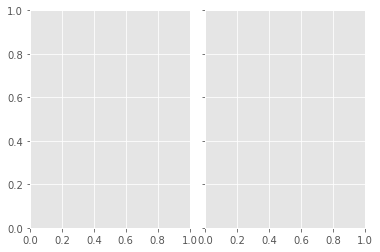

In [19]:
import matplotlib.style as style
style.use('ggplot')
sns.set_color_codes("deep")
sns.despine()
#https://en.wikipedia.org/wiki/Financial_and_social_rankings_of_sovereign_states_in_Europe
f, (ax1, ax2) = plt.subplots(1,2, sharey =True, gridspec_kw = {'wspace':0.1, 'hspace':0})
   
fte_graph = dfgdp_percentage.tail(12).plot(x = 'Year', y = ["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France", #3
"Germany", #1
"Greece",
"Hungary",
"Ireland",
"Italy", #4
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",#5
"Sweden", #2
"United Kingdom"], figsize = (20,8),color =['#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#0000FF','#000000',
                                            '#D3D3D3','#D3D3D3','#D3D3D3','#008000','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3',
                                            '#FFDF00','#D3D3D3','#FF6347'], ax = ax1)


fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 9)
# Customizing the tick labels of the y-axis 
# fte_graph.set_ylim(0,25)
# # Generate a bolded horizontal line at y = 0 

fte_graph.get_xaxis().get_major_formatter().set_useOffset(False)
# # Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# # Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

# # Remove the tick marks; they are unnecessary with the tick lines we just
# # plotted.
fte_graph.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# fte_graph.text(x = 2009, y = 26.0, s = "Annual GDP Growth",
#                 fontsize = 15, weight = 'bold', alpha = .75)
fte_graph.set_xlabel('Year',fontsize=12, weight = 'bold', alpha = .75)

fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}%'.format))
#fte_graph.legend([]) 
fte_graph.set_title("Annual GDP Growth" , fontsize=15)
fte_graph.legend(labels=["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"United Kingdom"],frameon=False,ncol= 4,fontsize= 8,loc='upper left').get_frame().set_edgecolor('red') 
#skip every one x-tick for cleanliness

fte_graph_1 = dfinf_percentage.tail(12).plot(x = 'Year', y = ["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France", #3
"Germany", #1
"Greece",
"Hungary",
"Ireland",
"Italy", #4
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",#5
"Sweden", #2
"United Kingdom"], figsize = (20,8),color =['#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#0000FF','#000000',
                                            '#D3D3D3','#D3D3D3','#D3D3D3','#008000','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3',
                                            '#FFDF00','#D3D3D3','#FF6347'], ax = ax2)


fte_graph_1.tick_params(axis = 'both', which = 'major', labelsize = 9)
# Customizing the tick labels of the y-axis 
# fte_graph.set_ylim(0,25)
# # Generate a bolded horizontal line at y = 0 

fte_graph_1.get_xaxis().get_major_formatter().set_useOffset(False)
# # Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# # Remove the plot frame lines. They are unnecessary here.
fte_graph_1.spines['top'].set_visible(False)
fte_graph_1.spines['bottom'].set_visible(False)
fte_graph_1.spines['right'].set_visible(False)
fte_graph_1.spines['left'].set_visible(False)

# # Remove the tick marks; they are unnecessary with the tick lines we just
# # plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# fte_graph_1.text(x = 2009, y = 26.0, s = "Annual Inflation ",
#                 fontsize = 15, weight = 'bold', alpha = .75)
fte_graph_1.set_xlabel('Year',fontsize=12, weight = 'bold', alpha = .75)
fte_graph_1.legend([])
# fte_graph_1.legend(labels=["Austria",
# "Belgium",
# "Bulgaria",
# "Croatia",
# "Cyprus",
# "Czech Republic",
# "Denmark",
# "Estonia",
# "Finland",
# "France",
# "Germany",
# "Greece",
# "Hungary",
# "Ireland",
# "Italy",
# "Latvia",
# "Lithuania",
# "Luxembourg",
# "Malta",
# "Netherlands",
# "Poland",
# "Portugal",
# "Romania",
# "Slovak Republic",
# "Slovenia",
# "Spain",
# "Sweden",
# "United Kingdom"],frameon=False,ncol= 4,fontsize= 8,loc='upper right').get_frame().set_edgecolor('red') 
fte_graph_1.set_title("Annual Inflation" , fontsize=15)
plt.tight_layout
plt.savefig("euGDP-Inflation.png", bbox_inches="tight")

In [23]:
df2 = df[df['Country Name'].isin([
"France",
"Germany",
"Italy",
"Spain",
"United Kingdom"
])]
df3 = df2[df2['2015'].notnull()]

In [24]:
dfgdp_percentage = df3[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][df3['Indicator Name'] =='GDP growth (annual %)']
dfgdp_percentage = dfgdp_percentage.drop('Indicator Name', 1)

dfgdp_percentage = dfgdp_percentage.T.reset_index()
dfgdp_percentage.columns = dfgdp_percentage.iloc[0]
#dfgdp_percentage.drop(dfgdp_percentage.index[0])
dfgdp_percentage = dfgdp_percentage.iloc[1:]
dfgdp_percentage = dfgdp_percentage.rename(columns={ dfgdp_percentage.columns[0]: "Year" })
dfgdp_percentage["Year"] = dfgdp_percentage.Year.astype(int)
dfgdp_percentage.iloc[:,1:] = dfgdp_percentage.iloc[:,1:].astype(float)

In [25]:
dfinf_percentage = df3[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][df3['Indicator Name'] =='Inflation, GDP deflator (annual %)']
dfinf_percentage = dfinf_percentage.drop('Indicator Name', 1)

dfinf_percentage = dfinf_percentage.T.reset_index()
dfinf_percentage.columns = dfinf_percentage.iloc[0]
#dfgdp_percentage.drop(dfgdp_percentage.index[0])
dfinf_percentage = dfinf_percentage.iloc[1:]
dfinf_percentage = dfinf_percentage.rename(columns={ dfinf_percentage.columns[0]: "Year" })
dfinf_percentage["Year"] = dfinf_percentage.Year.astype(int)
dfinf_percentage.iloc[:,1:] = dfinf_percentage.iloc[:,1:].astype(float)
#dfgdp_percentage

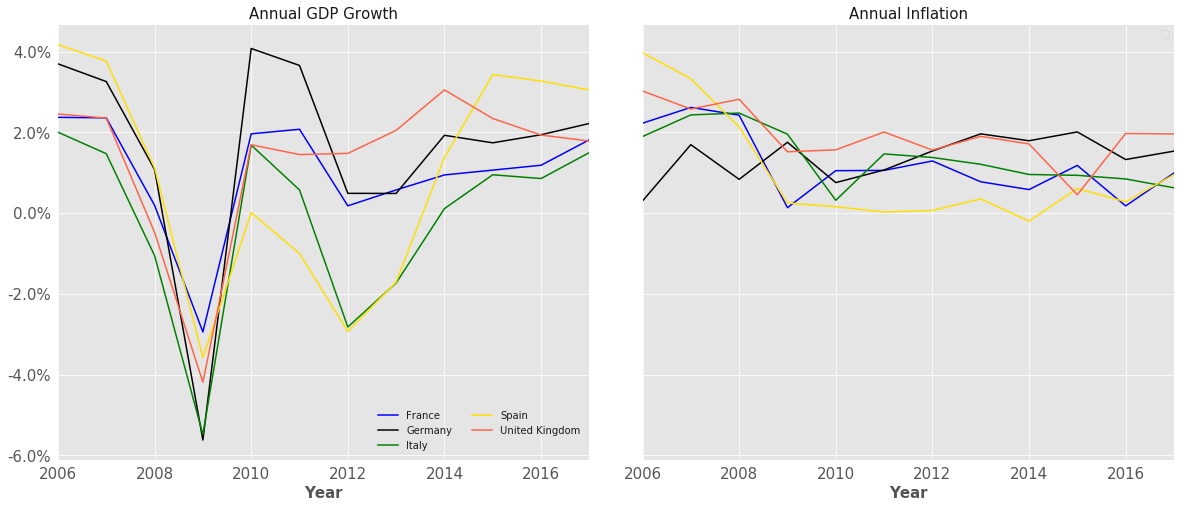

In [32]:
import matplotlib.style as style
style.use('ggplot')
sns.set_color_codes("deep")
sns.despine()
#https://en.wikipedia.org/wiki/Financial_and_social_rankings_of_sovereign_states_in_Europe
f, (ax1, ax2) = plt.subplots(1,2, sharey =True, gridspec_kw = {'wspace':0.1, 'hspace':0})
   
fte_graph = dfgdp_percentage.tail(12).plot(x = 'Year', y =[ 
"France", #3
"Germany", #1
"Italy", #4
"Spain",#5
"United Kingdom"], figsize = (20,8),color =['#0000FF','#000000',
                                            '#008000',
                                            '#FFDF00','#FF6347'], ax = ax1)


fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 15)
# Customizing the tick labels of the y-axis 
# fte_graph.set_ylim(0,25)
# # Generate a bolded horizontal line at y = 0 

fte_graph.get_xaxis().get_major_formatter().set_useOffset(False)
# # Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# # Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

# # Remove the tick marks; they are unnecessary with the tick lines we just
# # plotted.
fte_graph.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# fte_graph.text(x = 2009, y = 26.0, s = "Annual GDP Growth",
#                 fontsize = 15, weight = 'bold', alpha = .75)
fte_graph.set_xlabel('Year',fontsize=15, weight = 'bold')

fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}%'.format))
#fte_graph.legend([]) 
fte_graph.set_title("Annual GDP Growth" , fontsize=15)
fte_graph.legend(labels=[
"France",
"Germany",
"Italy",
"Spain",
"United Kingdom"],frameon=False,fontsize= 10,ncol =2,loc='lower right').get_frame().set_edgecolor('red') 
#skip every one x-tick for cleanliness

fte_graph_1 = dfinf_percentage.tail(12).plot(x = 'Year', y = ["France", #3
"Germany", #1
"Italy", #4
"Spain",#5
"United Kingdom"], figsize = (20,8),color =['#0000FF','#000000',
                                            '#008000',
                                            '#FFDF00','#FF6347'], ax = ax2)


fte_graph_1.tick_params(axis = 'both', which = 'major', labelsize = 15)
# Customizing the tick labels of the y-axis 
# fte_graph.set_ylim(0,25)
# # Generate a bolded horizontal line at y = 0 

fte_graph_1.get_xaxis().get_major_formatter().set_useOffset(False)
# # Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# # Remove the plot frame lines. They are unnecessary here.
fte_graph_1.spines['top'].set_visible(False)
fte_graph_1.spines['bottom'].set_visible(False)
fte_graph_1.spines['right'].set_visible(False)
fte_graph_1.spines['left'].set_visible(False)

# # Remove the tick marks; they are unnecessary with the tick lines we just
# # plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# fte_graph_1.text(x = 2009, y = 26.0, s = "Annual Inflation ",
#                 fontsize = 15, weight = 'bold', alpha = .75)
fte_graph_1.set_xlabel('Year',fontsize=15, weight = 'bold')
fte_graph_1.legend([])
# fte_graph_1.legend(labels=["Austria",
# "Belgium",
# "Bulgaria",
# "Croatia",
# "Cyprus",
# "Czech Republic",
# "Denmark",
# "Estonia",
# "Finland",
# "France",
# "Germany",
# "Greece",
# "Hungary",
# "Ireland",
# "Italy",
# "Latvia",
# "Lithuania",
# "Luxembourg",
# "Malta",
# "Netherlands",
# "Poland",
# "Portugal",
# "Romania",
# "Slovak Republic",
# "Slovenia",
# "Spain",
# "Sweden",
# "United Kingdom"],frameon=False,ncol= 4,fontsize= 8,loc='upper right').get_frame().set_edgecolor('red') 
fte_graph_1.set_title("Annual Inflation" , fontsize=15)
plt.tight_layout
plt.savefig("eu-gdp.png", bbox_inches="tight")

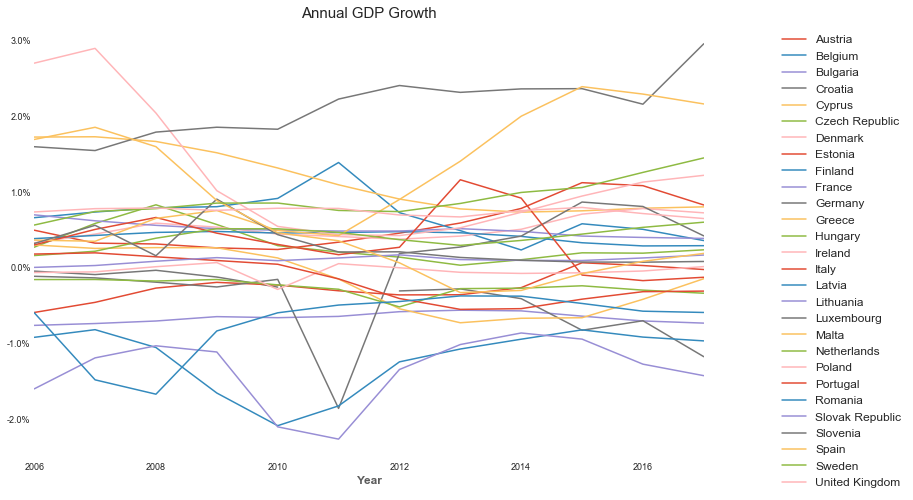

In [33]:
import matplotlib.style as style
style.use('seaborn-white')
sns.set_color_codes("deep")
sns.despine()
#https://en.wikipedia.org/wiki/Financial_and_social_rankings_of_sovereign_states_in_Europe
#f, (ax) = plt.subplots(1,2, sharey =True, gridspec_kw = {'wspace':0.1, 'hspace':0})
   
fte_graph = dfp_percentage.tail(12).plot(x = 'Year', y = ["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France", #3
"Germany", #1
"Greece",
"Hungary",
"Ireland",
"Italy", #4
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",#5
"Sweden", #2
"United Kingdom"], figsize = (12,8))
                                                          #,color =['#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#0000FF','#000000',
#                                             '#D3D3D3','#D3D3D3','#D3D3D3','#008000','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3',
#                                             '#FFDF00','#D3D3D3','#FF6347'])


fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 9)
# Customizing the tick labels of the y-axis 
# fte_graph.set_ylim(0,25)
# # Generate a bolded horizontal line at y = 0 

fte_graph.get_xaxis().get_major_formatter().set_useOffset(False)
# # Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# # Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

# # Remove the tick marks; they are unnecessary with the tick lines we just
# # plotted.
fte_graph.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# fte_graph.text(x = 2009, y = 26.0, s = "Annual GDP Growth",
#                 fontsize = 15, weight = 'bold', alpha = .75)
fte_graph.set_xlabel('Year',fontsize=12, weight = 'bold', alpha = .75)

fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}%'.format))
#fte_graph.legend([]) 
fte_graph.set_title("Annual GDP Growth" , fontsize=15)
fte_graph.legend(labels=["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"United Kingdom"],frameon=False,ncol= 1,fontsize= 12,bbox_to_anchor=(1.10, 1)).get_frame().set_edgecolor('red') 
#skip every one x-tick for cleanliness


plt.tight_layout
plt.savefig("eu-population.png", bbox_inches="tight")

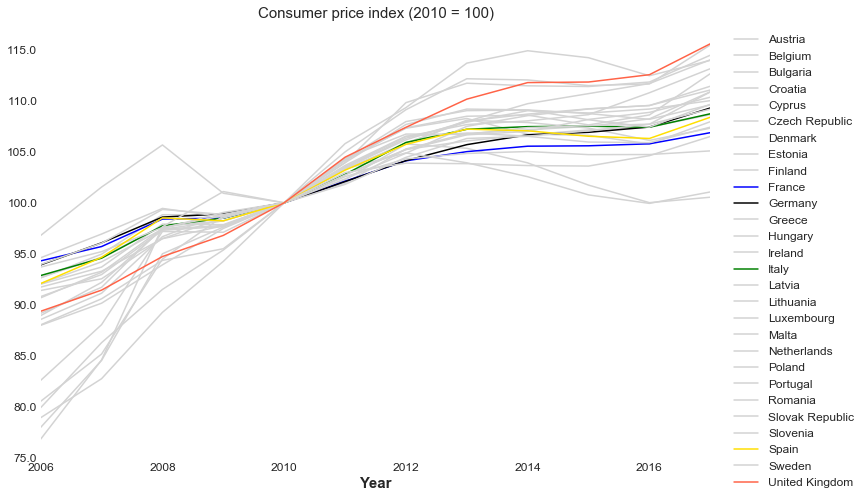

In [37]:
import matplotlib.style as style
style.use('seaborn-white')
sns.set_color_codes("deep")
sns.despine()
#https://en.wikipedia.org/wiki/Financial_and_social_rankings_of_sovereign_states_in_Europe
#f, (ax) = plt.subplots(1,2, sharey =True, gridspec_kw = {'wspace':0.1, 'hspace':0})
   
fte_graph = dfc_percentage.tail(12).plot(x = 'Year', y = ["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France", #3
"Germany", #1
"Greece",
"Hungary",
"Ireland",
"Italy", #4
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",#5
"Sweden", #2
"United Kingdom"], figsize = (12,8),color =['#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#0000FF','#000000',
                                            '#D3D3D3','#D3D3D3','#D3D3D3','#008000','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3',
                                             '#FFDF00','#D3D3D3','#FF6347'])


#fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 9)
# Customizing the tick labels of the y-axis 
# fte_graph.set_ylim(0,25)
# # Generate a bolded horizontal line at y = 0 

fte_graph.get_xaxis().get_major_formatter().set_useOffset(False)
# # Add an extra vertical line by tweaking the range of the x-axis
#fte_graph.set_xlim(left = 1, right = 2017)
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)

# # Remove the plot frame lines. They are unnecessary here.
fte_graph.spines['top'].set_visible(False)
fte_graph.spines['bottom'].set_visible(False)
fte_graph.spines['right'].set_visible(False)
fte_graph.spines['left'].set_visible(False)

# # Remove the tick marks; they are unnecessary with the tick lines we just
# # plotted.
fte_graph.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

# fte_graph.text(x = 2009, y = 26.0, s = "Annual GDP Growth",
#                 fontsize = 15, weight = 'bold', alpha = .75)
fte_graph.set_xlabel('Year',fontsize=15, weight = 'bold')

fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 12)

fte_graph.yaxis.set_major_formatter(plt.FuncFormatter('{}'.format))
#fte_graph.legend([]) 
fte_graph.set_title("Consumer price index (2010 = 100)" , fontsize=15)
fte_graph.legend(labels=["Austria",
"Belgium",
"Bulgaria",
"Croatia",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Ireland",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Malta",
"Netherlands",
"Poland",
"Portugal",
"Romania",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"United Kingdom"],frameon=False,ncol= 1,fontsize= 12,bbox_to_anchor=(1.02, 1)).get_frame().set_edgecolor('red') 
#skip every one x-tick for cleanliness


plt.tight_layout
plt.savefig("eu_consumer_index.png", bbox_inches="tight")

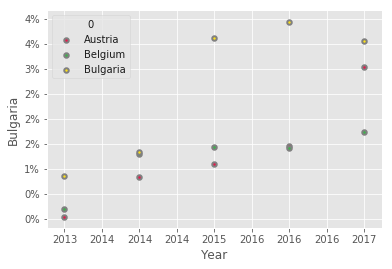

In [16]:
ax = dfgdp_percentage.tail(5).plot(kind="scatter", x="Year",y="Austria",s =20, edgecolors="grey", linewidth=2,c='#e6194b', label="Austria")
dfgdp_percentage.tail(5).plot(kind="scatter", x="Year",y="Belgium",s =20,ax =ax, edgecolors="grey", linewidth=2,c = '#3cb44b', label="Belgium")
dfgdp_percentage.tail(5).plot(kind="scatter", x="Year",y="Bulgaria",s =20,ax=ax, edgecolors="grey", linewidth=2,c ='#ffe119', label="Bulgaria")
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

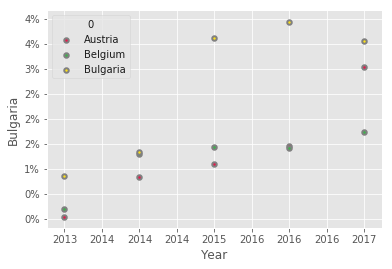

In [16]:
ax = dfgdp_percentage.tail(5).plot(kind="scatter", x="Year",y="Austria",s =20, edgecolors="grey", linewidth=2,c='#e6194b', label="Austria")
dfgdp_percentage.tail(5).plot(kind="scatter", x="Year",y="Belgium",s =20,ax =ax, edgecolors="grey", linewidth=2,c = '#3cb44b', label="Belgium")
dfgdp_percentage.tail(5).plot(kind="scatter", x="Year",y="Bulgaria",s =20,ax=ax, edgecolors="grey", linewidth=2,c ='#ffe119', label="Bulgaria")
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

In [69]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

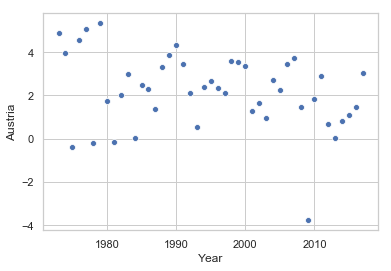

In [28]:
sns.scatterplot(x="Year", y='Austria', data=dfgdp_percentage)

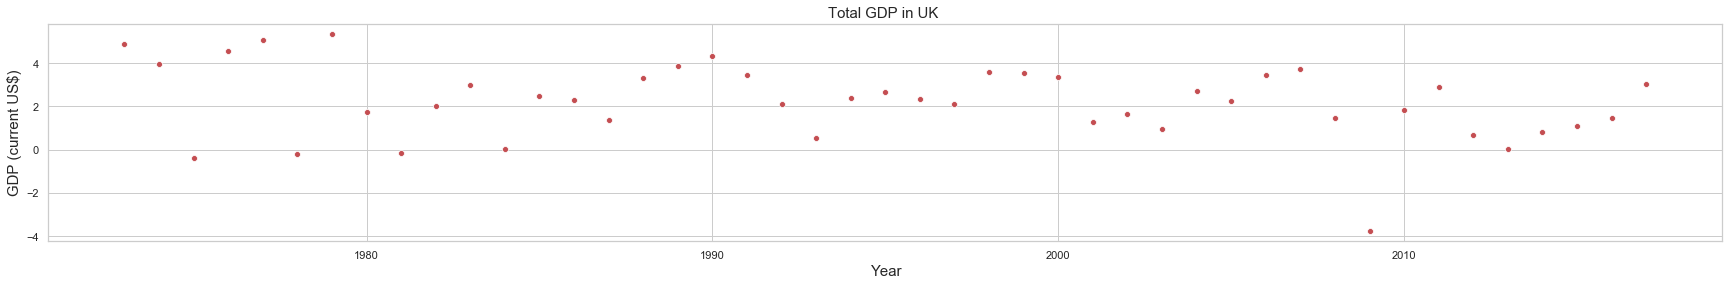

In [23]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 4))

# Plot the total crashes
sns.set_color_codes("deep")
sns.scatterplot(x="Year", y='Austria', data=dfgdp_percentage, color="r")
#sns.despine()
plt.title('Total GDP in UK ', fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('GDP (current US$)', fontsize= 15)
plt.show()


In [ ]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 4))

# Plot the total crashes
sns.set_color_codes("deep")
sns.lineplot(x="Country Name", y='GDP growth (annual %)', data=dfgdp_percentage, color="r")
#sns.despine()
plt.title('Total GDP in UK ', fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('GDP (current US$)', fontsize= 15)
plt.show()

###### Need to reformat all of the cells as above

In [ ]:
dfgdp_percapita_percentage = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='GDP per capita growth (annual %)']

In [ ]:
dfgdp = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='GDP (current US$)']

In [ ]:
df_inflation = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='Inflation, GDP deflator (annual %)']

In [ ]:
df_cpi = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] =='Consumer price index (2010 = 100)']

In [ ]:
df_population = dfi2[['Country Name','Indicator Name','1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']][dfi2['Indicator Name'] == 'Population growth (annual %)']

In [ ]:
#Select from 1973
# dfeu = dfeu[['Country Name', 'Indicator Name', '1973', '1974', '1975',
#        '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
#        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
#        '2016', '2017']]

In [ ]:
# dfeu = dfi2[dfi2['Indicator Name'].isin(['GDP (current US$)',
#  'GDP per capita (current US$)',
 
#  'GDP growth (annual %)', 
#  'GDP per capita growth (annual %)',
# 'Inflation, GDP deflator (annual %)',
#    'Consumer price index (2010 = 100)',
#     'Population growth (annual %)'])].groupby(['Country Name','Indicator Name']).mean().reset_index()

In [ ]:
# #Select the row with Total population , select only the years data, transpose the data and reset the index
# dfi2[dfi2['Indicator Name'].isin(['GDP (current US$)',
#  'GDP per capita (current US$)',
 
#  'GDP growth (annual %)', 
#  'GDP per capita growth (annual %)'])].iloc[:,1:60].T.reset_index()
